In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

sns.set_theme(context="poster")
# pal = sns.color_palette()

In [2]:
filedir = '/home/local/VANDERBILT/dolel/Documents/rsHRF_project/output/WM_GM_analysis/csv_all_infos/'
params = ['Height', 'DipHeight', 'TroughHeight', 'PeakIntegral', 'DipIntegral','TroughIntegral', 'Time2peak', 'Time2dip', 'Time2trough',  'FWHM']

In [3]:
def remove_outlier(df, index):
    Q1 = df[index].quantile(0.25)
    Q3 = df[index].quantile(0.75)

    IQR = Q3 - Q1

    filter = (df[index] >= Q1 - 2*IQR) &  (df[index] <= Q3 + 2*IQR)
    outlier =  (df[index] <= Q1 - 2*IQR) |  (df[index] >= Q3 + 2*IQR)

    return df.loc[filter], df.loc[outlier]

def clean_dataframe(df, index):
  df = df[(df != 0).all(1)]
  df = df.dropna()
  
  df_inliers, df_outlier = remove_outlier(df, index)

  return df_inliers, df_outlier


def create_indicator(df):

    df1 = df.drop(columns=['GM', 'GM_Harmonization_TR_and_Scanner', 'WM_Harmonization_TR_and_Scanner'])
    df1 = df1.rename(columns={'WM':'WM'})
    df1['Indicator'] = 'WM'

    df2 = df.drop(columns=['GM', 'GM_Harmonization_TR_and_Scanner', 'WM'])
    df2 = df2.rename(columns={'WM_Harmonization_TR_and_Scanner':'WM'})
    df2['Indicator'] = 'WM_scanners_harmonized'


    return pd.concat([df1, df2])

In [4]:
TR_to_keep = sorted([3.000, 0.607, 3.025, 0.788])

In [5]:
feature = params[-1]
file = filedir + feature + '.csv'
df = pd.read_csv(file)



df_1 = df.loc[ df['TR'] <=1]
df_1.insert(5, "Mean_Brain",df_1[["GM", "WM"]].mean(axis=1), True)
_, df_1 = clean_dataframe(df_1, 'Mean_Brain')

df_2 = df.loc[ df['TR'] > 1]
df_2.insert(5, "Mean_Brain",df_2[["GM", "WM"]].mean(axis=1), True)
_, df_2 = clean_dataframe(df_2, 'Mean_Brain')

df_seuil = pd.concat([df_2, df_1])


# df, df_seuil = remove_outlier(df, 'WM')

In [6]:
# df_seuil = df_seuil.Experiment

In [7]:
len(df_seuil)

42

In [8]:
filedir = '/home/local/VANDERBILT/dolel/Documents/rsHRF_project/output/WM_GM_analysis/csv_harmonized/Model/'
params = ['Height', 'DipHeight', 'TroughHeight', 'PeakIntegral', 'DipIntegral','TroughIntegral', 'Time2peak', 'Time2dip', 'Time2trough',  'FWHM']

In [9]:
outdir = '/home/local/VANDERBILT/dolel/Documents/rsHRF_project/output/WM_GM_analysis/csv_cleaned/'

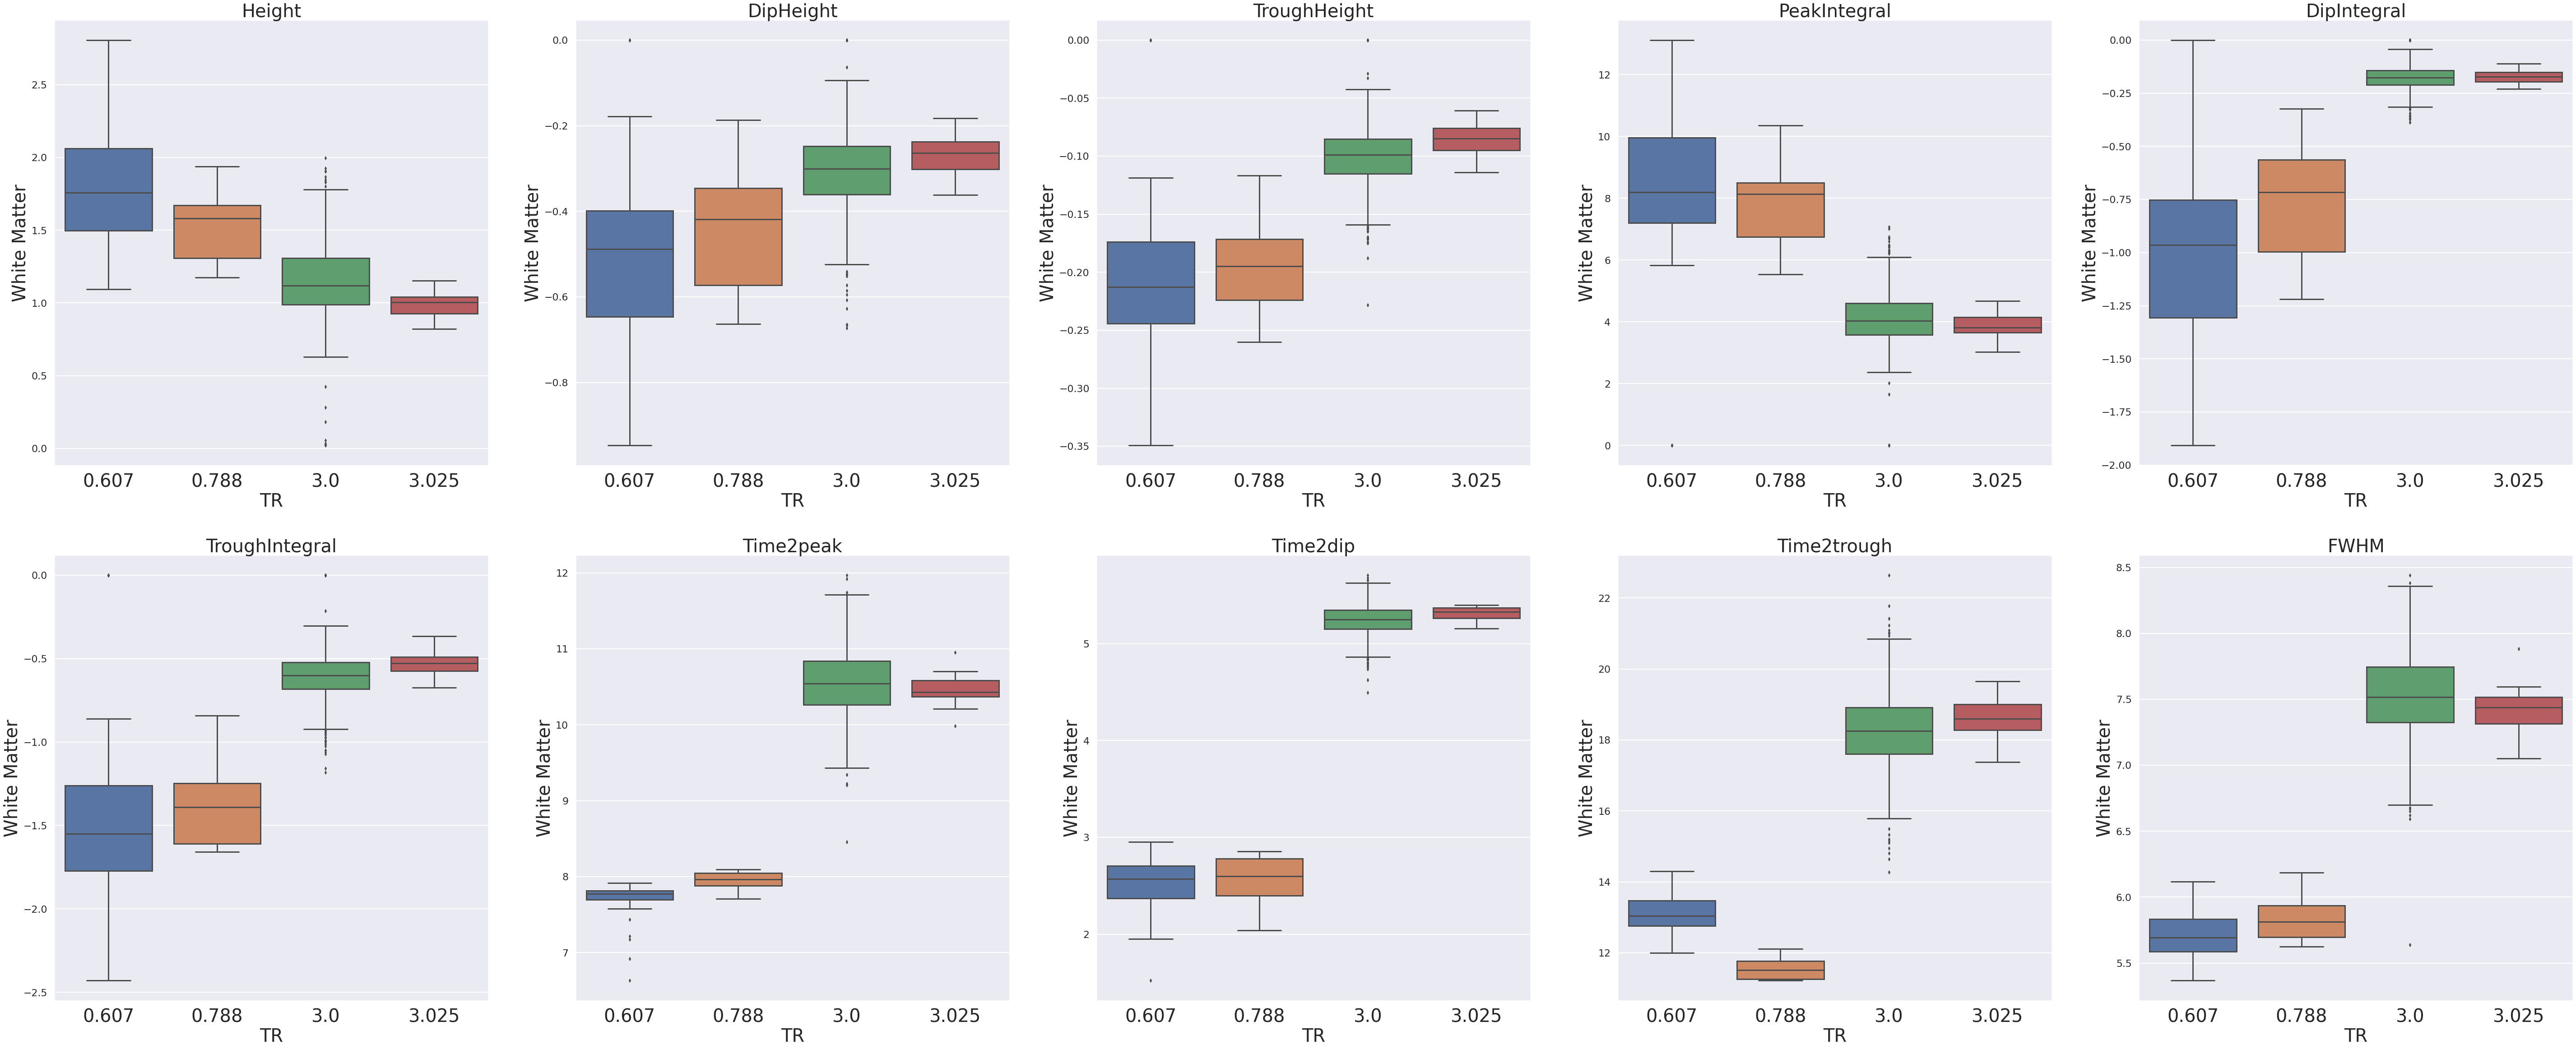

In [31]:
plt.figure(figsize=(100,40))

for i in range(10):
    feature = params[i]
    file = filedir + feature + '.csv'
    df = pd.read_csv(file)

    # df = pd.merge(df,df_seuil, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

    df = df.loc[ df['TR'].isin(TR_to_keep)]
    df, _ = remove_outlier(df, 'WM_Harmonization_Scanner')
   

    
    plt.subplot(2,5,i+1)

    ax = sns.boxplot(y="WM", x="TR", data=df)

    font = 40
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = font)

    # ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)

    # ax.set_xticks(fontsize=50)
    # ax.set_yticks(fontsize=font)

    ax.set_ylabel("White Matter", fontsize=font)
    ax.set_xlabel("TR", fontsize=font)

    plt.title(feature, fontdict={'fontsize':font})
# plt.suptitle("Impact of Repetition Time on the HRF", font)
